# Data Analysis

+ What is the relationship between people who survived and where the embarked onto the ship? Is there one city that has a higher percentage of survivors than others?

+ What is the relationship between people who survived and their passenger class on the ship? Did more first-class passengers survive over the second- and third-class passengers?

+ What is the relationship between the gender of the passengers and their survival rate? Did more females survive compared to males?

+ Is there a relationship between the gender and the passenger class on the ship? For example, did more females from first-class survive as opposed to, males from third-class?

+ How did age play a role in the survival rate of the passengers? Were passengers that were younger than 30 have a higher rate of survival than those that were 30 and older?

+ What was the age distribution in each passenger class? What was the age distribution of passengers as a function of the city that they boarded the ship?

+ What was the distribution of survivors as a function of the quartiles of their fare?

+ Was traveling alone the best predictor if you survived the titanic sinking? Specifically, did having a sibling or spouse reduce your changes of surviving the sinking? Was traveling without your parents or children an indicator of a higher rate of survival?

In [1]:
#Standard Imports 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reference datasets 

train_url = 'http://bit.ly/titanic-001'
test_url = 'http://bit.ly/titanic-002'
survive_url = 'http://bit.ly/titanic-003'

In [3]:
#Load datasets into Pandas dataframes

df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)
df_survive = pd.read_csv(survive_url)

In [4]:
#Combine df_test and df_survive using an inner join on 'PassengerId'

test_combined_df = pd.merge(df_test, df_survive, on='PassengerId', how='inner')
test_combined_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [5]:
#Combine the newly formed dataframe and df_train

df = test_combined_df.append(df_train)

In [6]:
#Display head of df_combined.

df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
# Assume that age of the NaN entires is equal to the mean of the data set.

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [9]:
# Assume that the fare of the NaN entires is equal to the mean of the data set.
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [10]:
df['Embarked'].fillna(df['Embarked'] == 'S', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [12]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911
1,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272
2,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276
3,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154
4,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298


In [13]:
df['SibSp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [14]:
df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [15]:
def parents_replace(c):
    if c['Parch'] == 0:
        return 'Yes'
    else:
        return 'No'

In [16]:
def sibling_replace(c):
    if c['SibSp'] == 0:
        return 'Yes'
    else:
        return 'No'

In [17]:
df['Travel_w_ Parents'] = df.apply(parents_replace, axis=1)

In [18]:
df['Travel_w_ Siblings'] = df.apply(sibling_replace, axis=1)

In [19]:
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [20]:
df['Fare'].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [21]:
bins = [0, 7.89, 14.45, 31.27, 512.32]
group_names = ['Low', 'Below Average', 'Above Average', 'High']

In [22]:
categories = pd.cut(df['Fare'], bins, labels=group_names)
df['FareCategories'] = pd.cut(df['Fare'], bins, labels=group_names)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories
0,34.5,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,Yes,Yes,Low
1,47.0,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272,Yes,No,Low
2,62.0,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276,Yes,Yes,Below Average
3,27.0,NaN,Southampton,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154,Yes,Yes,Below Average
4,22.0,NaN,Southampton,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298,No,No,Below Average


In [42]:
def queenstown(df):
    df_queenstown = df[df['Embarked'] == 'Queenstown']
    df_queenstown_gb = df[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean()
    return df_queenstown_gb['FareCategories'].tolist(), df_queenstown_gb['Age'].tolist()

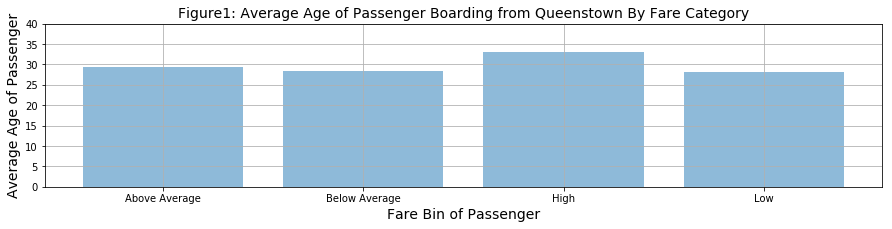

In [80]:
plt.figure(figsize=(15,3))
plt.bar(queenstown(df)[0], queenstown(df)[1], alpha = 0.5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.xlabel('Fare Bin of Passenger', fontsize = 14)
plt.title('Figure1: Average Age of Passenger Boarding from Queenstown By Fare Category', fontsize = 14)
plt.ylim(0, 40, 5)
plt.grid(True)
plt.show()

In [56]:
def southampton(df):
    df_southampton = df[df['Embarked'] == 'Southampton']
    df_southampton_gb = df_southampton[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
    return df_southampton_gb['FareCategories'].tolist(), df_southampton_gb['Age'].tolist()[1]

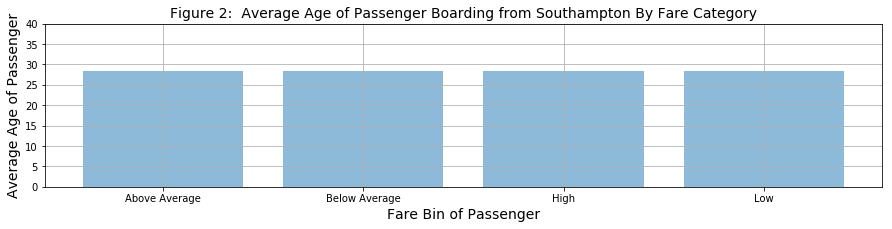

In [81]:
plt.figure(figsize=(15,3))
plt.bar(southampton(df)[0], southampton(df)[1], alpha = 0.5)
plt.grid(True)
plt.ylim(0, 40, 5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.xlabel('Fare Bin of Passenger', fontsize = 14)
plt.title('Figure 2:  Average Age of Passenger Boarding from Southampton By Fare Category', fontsize = 14)
plt.show()

In [67]:
def cherbourg(df):
    df_cherbourg = df[df['Embarked'] == 'Cherbourg']
    df_cherbourg_gb = df_cherbourg[['Age', 'FareCategories']].groupby(['FareCategories'], as_index=False).mean() 
    return df_cherbourg_gb['FareCategories'].tolist(), df_cherbourg_gb['Age'].tolist()

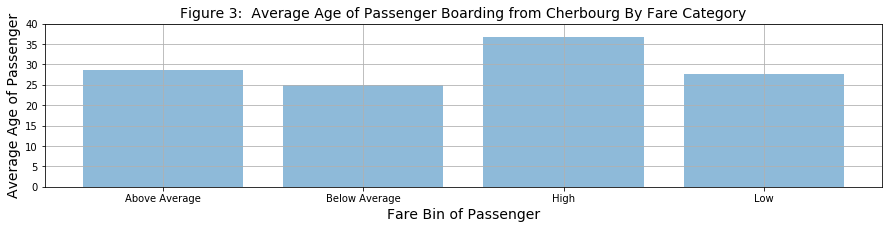

In [82]:
plt.figure(figsize=(15,3))
plt.bar(cherbourg(df)[0], cherbourg(df)[1], alpha = 0.5)
plt.ylabel('Average Age of Passenger', fontsize = 14)
plt.ylim(0, 40, 5)
plt.xlabel('Fare Bin of Passenger', fontsize = 14)
plt.title('Figure 3:  Average Age of Passenger Boarding from Cherbourg By Fare Category', fontsize = 14)
plt.grid(True)
plt.show()

### (Analysis 1) Summary of the average age of the passengers and their fare amount, broken out by city.
Analysis of Figures 1-3 show that the average age of passengers in the thrid quartile was the highest from the city of Cherbourg, followed by Queenstown and Southampton.

In [75]:
df['Age'].describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [76]:
bins = [0.17, 22.00, 29.88, 35.00, 80.00]
group_names = ['Low', 'Below Average', 'Above Average', 'High']

In [91]:
df['AgeCategories'] = pd.cut(df['Age'], bins, labels=group_names).reset_index()

In [92]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories,AgeCategories
0,34.5,NaN,Queenstown,7.8292,"Kelly, Mr. James",0,892,3,male,0,0,330911,Yes,Yes,Low,0
1,47.0,NaN,Southampton,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,1,363272,Yes,No,Low,1
2,62.0,NaN,Queenstown,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,0,240276,Yes,Yes,Below Average,2
3,27.0,NaN,Southampton,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,0,315154,Yes,Yes,Below Average,3
4,22.0,NaN,Southampton,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,1,3101298,No,No,Below Average,4


In [93]:
df[df['Embarked'] == False]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories,AgeCategories
61,38.0,B28,False,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572,Yes,Yes,High,61
829,62.0,B28,False,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572,Yes,Yes,High,411


In [98]:
df[df['Name'] == 'Icard, Miss. Amelie']
df[df['Name'] == 'Stone, Mrs. George Nelson (Martha Evelyn)']

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Travel_w_ Parents,Travel_w_ Siblings,FareCategories,AgeCategories
829,62.0,B28,False,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572,Yes,Yes,High,411


### What is the relationship between people who survived and where the embarked onto the ship? Is there one city that has a higher percentage of survivors than others?

In [119]:
survival_city_gb = df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()
survival_city_filter = survival_city_gb.iloc[1:4]

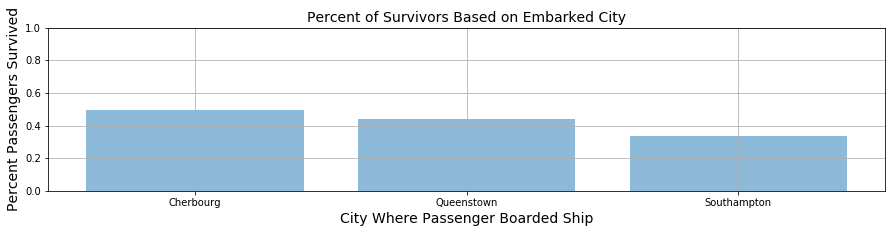

In [122]:
plt.figure(figsize=(15, 3))
plt.bar(survival_city_filter['Embarked'].tolist(), survival_city_filter['Survived'].tolist(), alpha = 0.5)
plt.ylabel('Percent Passengers Survived', fontsize = 14)
plt.xlabel('City Where Passenger Boarded Ship', fontsize = 14)
plt.title('Percent of Survivors Based on Embarked City', fontsize = 14)
plt.ylim(0, 1, 0.1)
plt.grid(True)
plt.show()

### What is the relationship between people who survived and their passenger class on the ship? Did more first-class passengers survive over the second- and third-class passengers?

In [141]:
survival_class_gb = df[['Survived', 'Pclass']].groupby(['Pclass'], as_index=False).mean()
survival_class_gb

,Pclass,Survived
0,1,0.575851
1,2,0.422383
2,3,0.269394


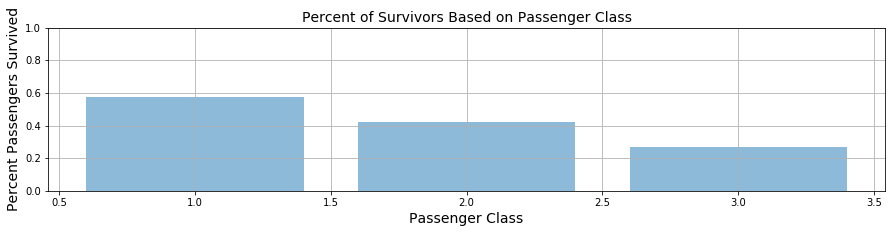

In [140]:
plt.figure(figsize=(15, 3))
plt.bar(survival_class_gb['Pclass'], survival_class_gb['Survived'], alpha = 0.5)
plt.ylim(0, 1, 0.1)
plt.grid(True)
plt.ylabel('Percent Passengers Survived', fontsize = 14)
plt.xlabel('Passenger Class', fontsize = 14)
plt.title('Percent of Survivors Based on Passenger Class', fontsize = 14)
plt.show()

### What is the relationship between the gender of the passengers and their survival rate? Did more females survive compared to males?

In [160]:
survival_sex_gb = df[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()
survival_sex_gb

,Sex,Survived
0,female,0.82618
1,male,0.12930


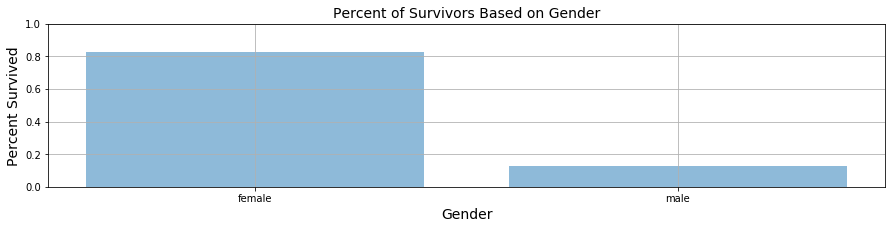

In [159]:
plt.figure(figsize=(15, 3))
plt.bar(survival_sex_gb['Sex'].tolist(), survival_sex_gb['Survived'].tolist(), alpha = 0.5)
plt.ylim(0, 1, 0.1)
plt.grid(True)
plt.ylabel('Percent Survived', fontsize = 14)
plt.xlabel('Gender', fontsize = 14)
plt.title('Percent of Survivors Based on Gender', fontsize = 14)
plt.show()

### Is there a relationship between the gender and the passenger class on the ship? For example, did more females from first-class survive as opposed to, males from third-class?

In [163]:
df_thrid_class = df[df['Pclass'] == 3]

In [164]:
df_thrid_class[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.666667
1,male,0.095335


In [165]:
df_second_class = df[df['Pclass'] == 2]

In [166]:
df_second_class[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.943396
1,male,0.099415


In [167]:
df_first_class = df[df['Pclass'] == 1]

In [168]:
df_first_class[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.979167
1,male,0.251397


### How did age play a role in the survival rate of the passengers? Were passengers that were younger than 30 have a higher rate of survival than those that were 30 and older?

In [173]:
df_older_30 = df[df['Age'] >= 30]

In [174]:
df_older_30[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.870588
1,male,0.136808


In [175]:
df_young_30 = df[df['Age'] < 30]

In [176]:
df_young_30[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.800676
1,male,0.125000


+ Was traveling alone the best predictor if you survived the titanic sinking? 
+ Specifically, did having a sibling or spouse reduce your changes of surviving the sinking? 
+ Was traveling without your parents or children an indicator of a higher rate of survival?

In [ ]:
df.pivot_table(index='Travel_w_ Parents', columns='Sex', aggfunc=sum)['Survived']

In [ ]:
df.pivot_table(index='Travel_w_ Parents', columns='Sex', aggfunc='count')['Survived']

In [ ]:
df.pivot_table(index='Travel_w_ Siblings', columns='Sex', aggfunc=sum)['Survived']

In [ ]:
df.pivot_table(index='Travel_w_ Siblings', columns='Sex', aggfunc='mean')['Age']

In [177]:
embark_perc = df[['Travel_w_ Siblings', "Survived"]].groupby(['Travel_w_ Siblings'],as_index=False).mean()
embark_perc

,Travel_w_ Siblings,Survived
0,No,0.468900
1,Yes,0.334456


In [ ]:
embark_perc = df[["Survived", "Sex"]].groupby(['Sex'],as_index=False).mean()
embark_perc